In [2]:
import pandas as pd
import pm4py
import sklearn
import pm4py

In [3]:
from urllib.request import urlretrieve
import os

# download from 4tu.nl
urlretrieve('https://data.4tu.nl/file/33632f3c-5c48-40cf-8d8f-2db57f5a6ce7/643dccf2-985a-459e-835c-a82bce1c0339', 'sepsis0.xes.gz')
sepsis_log = pm4py.read_xes('sepsis0.xes.gz')
os.unlink('sepsis0.xes.gz') # clean up

len(sepsis_log)

/Users/sjc/anaconda3/envs/ppm/lib/python3.10/site-packages/pm4py/util/dt_parsing/parser.py:82: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(
/Users/sjc/anaconda3/envs/ppm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 1050/1050 [00:00<00:00, 1161.11it/s]


15214

In [4]:
len(pm4py.get_variants_as_tuples(sepsis_log))

846

In [5]:
pm4py.get_start_activities(sepsis_log)

{'ER Registration': 995,
 'IV Liquid': 14,
 'ER Triage': 6,
 'CRP': 10,
 'ER Sepsis Triage': 7,
 'Leucocytes': 18}

In [6]:
pm4py.get_end_activities(sepsis_log)

{'Release A': 393,
 'Return ER': 291,
 'IV Antibiotics': 87,
 'Release B': 55,
 'ER Sepsis Triage': 49,
 'Leucocytes': 44,
 'IV Liquid': 12,
 'Release C': 19,
 'CRP': 41,
 'LacticAcid': 24,
 'Release D': 14,
 'Admission NC': 14,
 'Release E': 5,
 'ER Triage': 2}

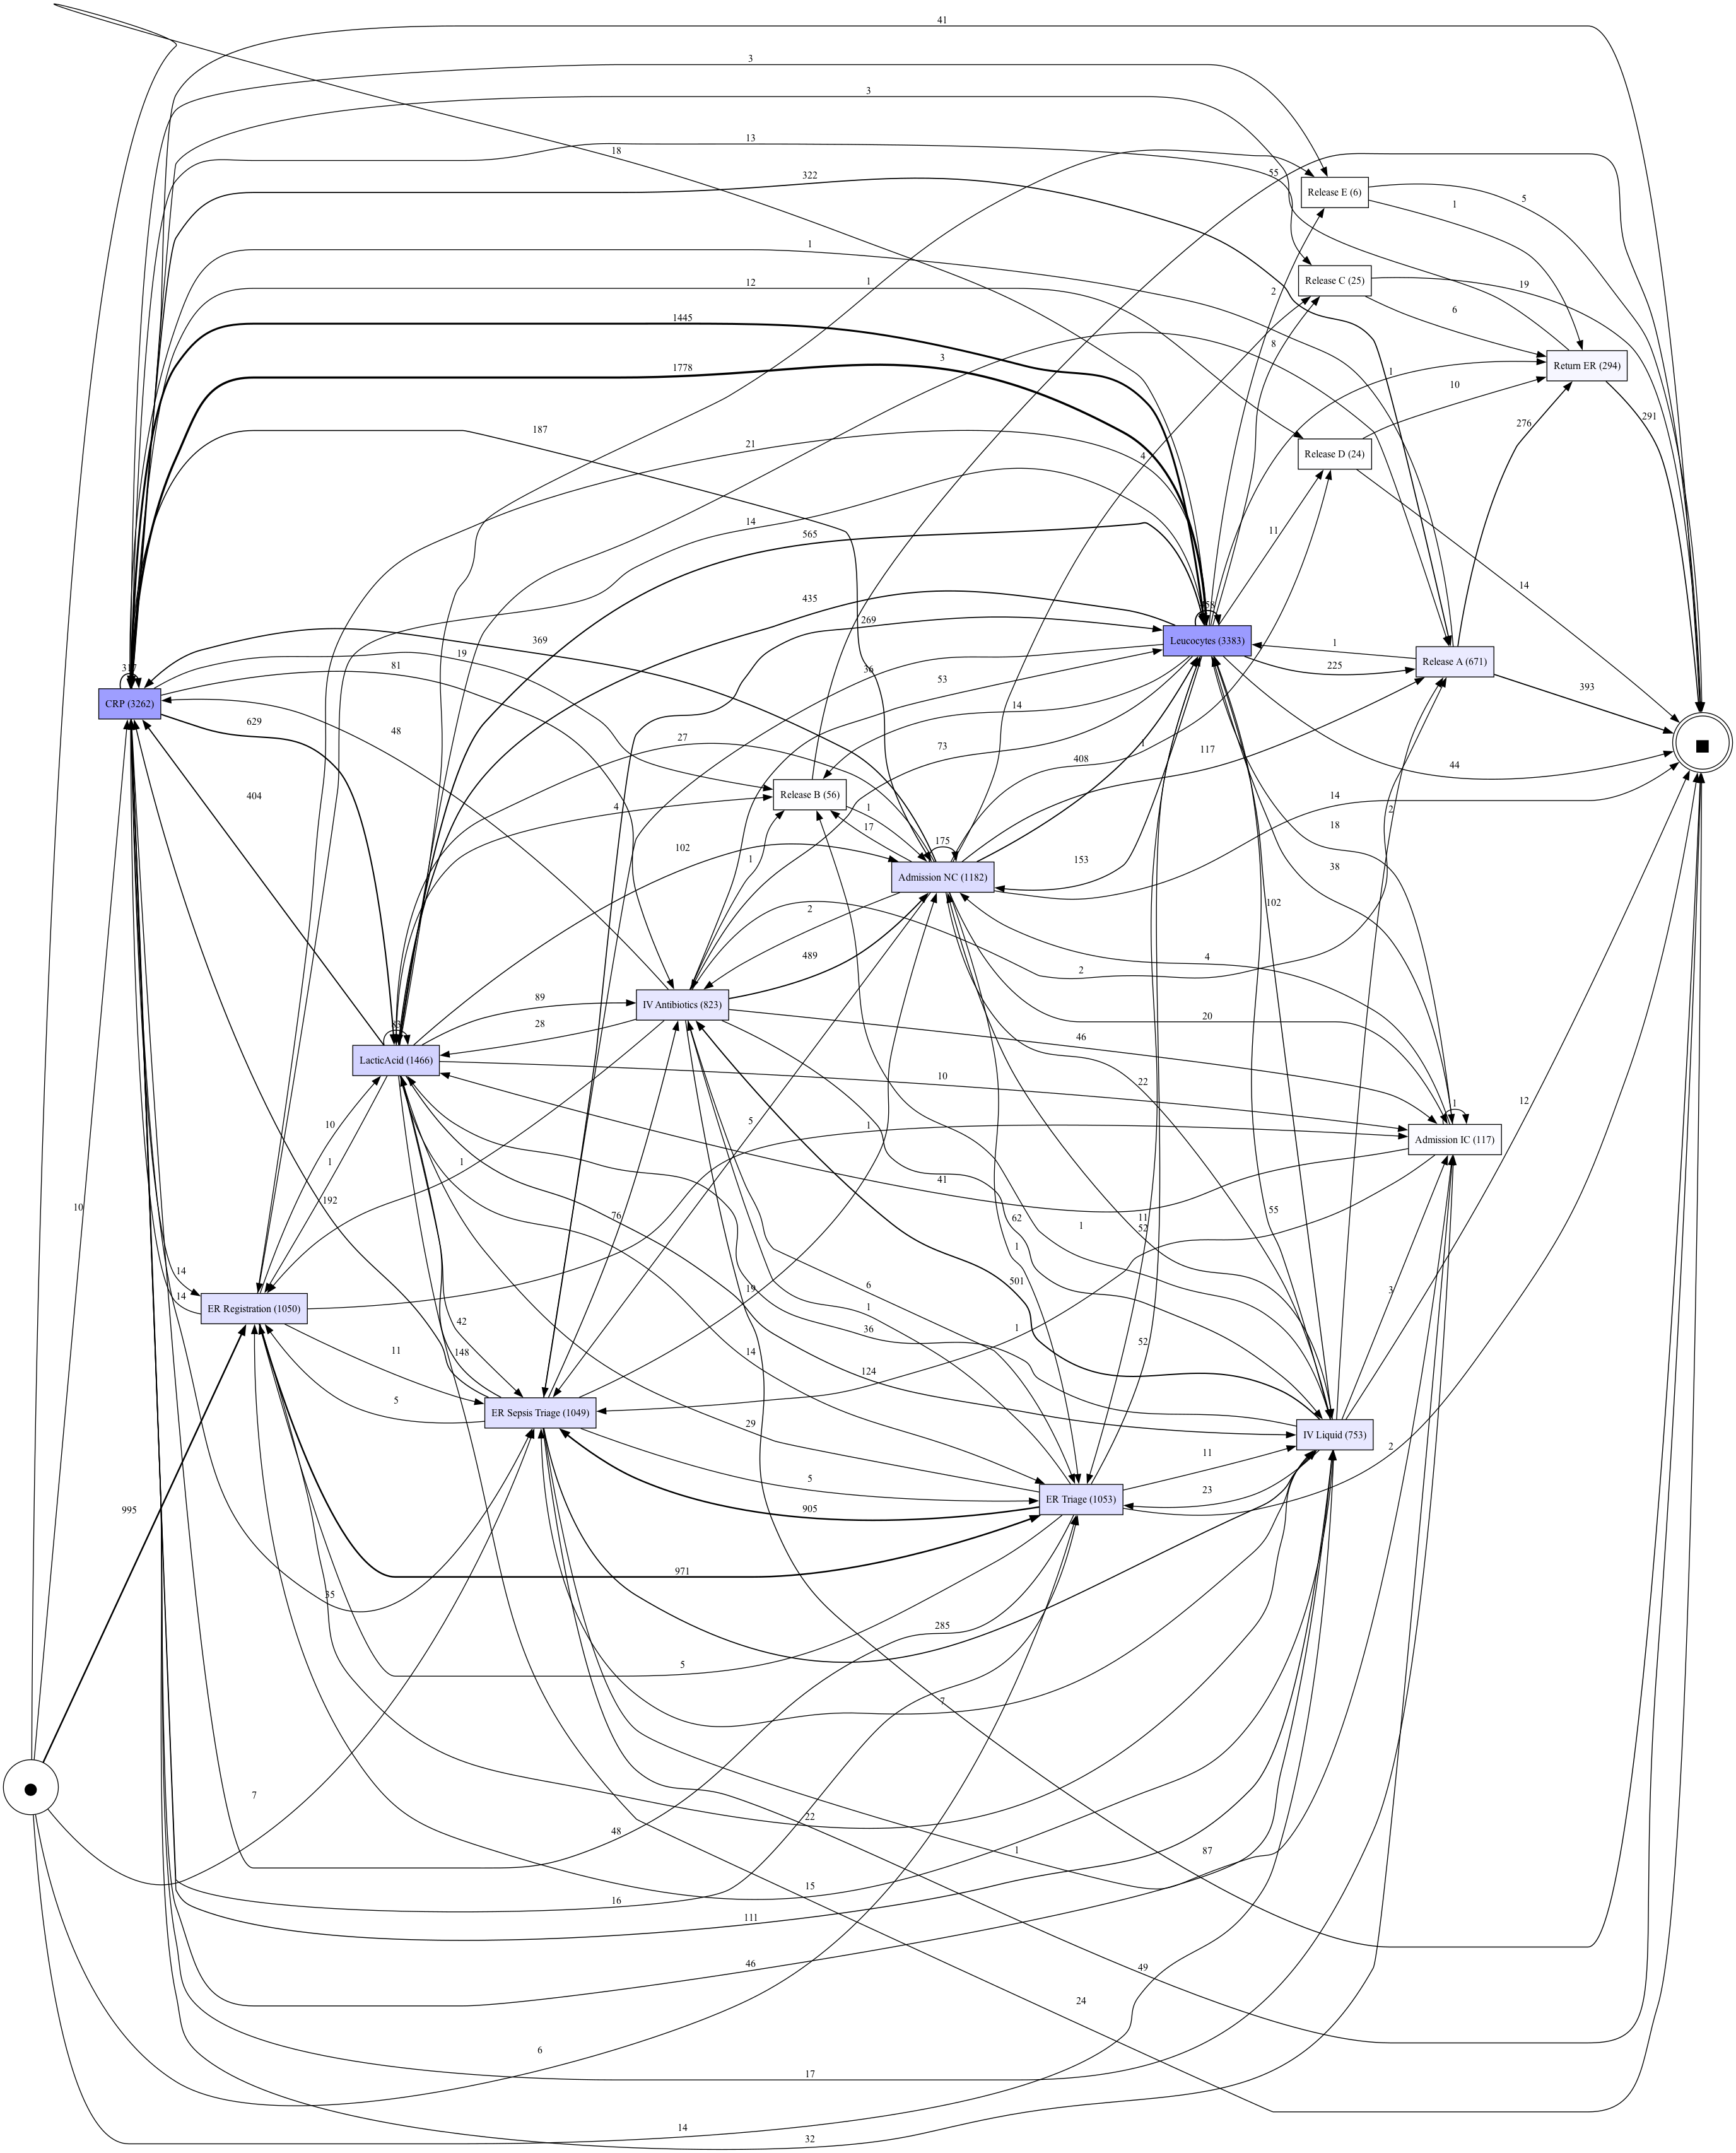

In [7]:
from pm4py.objects.conversion.log import converter as log_conversion
sepsis_event_log = log_conversion.apply(sepsis_log, {}, log_conversion.TO_EVENT_LOG)
dfg, start_activities, end_activities = pm4py.discover_dfg(sepsis_log)
pm4py.view_dfg(dfg, start_activities, end_activities)

In [10]:


# 将 DFG 转换为边列表
src_nodes = []
dst_nodes = []
edge_weights = []

for (src, dst), weight in dfg.items():
    src_nodes.append(src)
    dst_nodes.append(dst)
    edge_weights.append(weight)

print("Source Nodes:", src_nodes)
print("Destination Nodes:", dst_nodes)
print("Edge Weights:", edge_weights)

Source Nodes: ['Admission IC', 'Admission IC', 'Admission IC', 'Admission IC', 'Admission IC', 'Admission IC', 'Admission NC', 'Admission NC', 'Admission NC', 'Admission NC', 'Admission NC', 'Admission NC', 'Admission NC', 'Admission NC', 'Admission NC', 'Admission NC', 'Admission NC', 'Admission NC', 'Admission NC', 'CRP', 'CRP', 'CRP', 'CRP', 'CRP', 'CRP', 'CRP', 'CRP', 'CRP', 'CRP', 'CRP', 'CRP', 'CRP', 'CRP', 'CRP', 'ER Registration', 'ER Registration', 'ER Registration', 'ER Registration', 'ER Registration', 'ER Registration', 'ER Registration', 'ER Sepsis Triage', 'ER Sepsis Triage', 'ER Sepsis Triage', 'ER Sepsis Triage', 'ER Sepsis Triage', 'ER Sepsis Triage', 'ER Sepsis Triage', 'ER Sepsis Triage', 'ER Sepsis Triage', 'ER Triage', 'ER Triage', 'ER Triage', 'ER Triage', 'ER Triage', 'ER Triage', 'ER Triage', 'IV Antibiotics', 'IV Antibiotics', 'IV Antibiotics', 'IV Antibiotics', 'IV Antibiotics', 'IV Antibiotics', 'IV Antibiotics', 'IV Antibiotics', 'IV Antibiotics', 'IV Antibi

In [12]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# 获取所有活动名称
activities = list(set(src_nodes + dst_nodes))

# 使用 One-Hot 编码
encoder = OneHotEncoder(sparse_output=False)
activity_features = encoder.fit_transform(np.array(activities).reshape(-1, 1))

# 将活动名称映射到特征向量
node_features = {activity: feature for activity, feature in zip(activities, activity_features)}

print("Node Features:", node_features)

Node Features: {'Admission NC': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'ER Sepsis Triage': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'Return ER': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]), 'Release B': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), 'IV Antibiotics': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'IV Liquid': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]), 'CRP': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'Release D': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]), 'Release C': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]), 'Release E': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]), 'ER Registration': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'LacticAcid': array([0.

In [ ]:
import dgl
import torch

# 构建 DGL 图
g = dgl.graph((src_nodes, dst_nodes))

# 添加节点特征
g.ndata['features'] = torch.tensor([node_features[node] for node in g.nodes()])

# 添加边权重
g.edata['weights'] = torch.tensor(edge_weights, dtype=torch.float32)

print(g)

ModuleNotFoundError: No module named 'dgl'

In [2]:
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
from pm4py.objects.log.util import dataframe_utils


# 加载 CSV 文件
csv_log = pd.read_csv("/Users/sjc/Downloads/PROPHET-master/fold/sepsis.csv")

print(csv_log.columns)
csv_log = pd.DataFrame(csv_log)
# 确保列名符合 PM4Py 的要求
csv_log = csv_log.rename(columns={
    'case_id': 'case:concept:name',  # 案例 ID
    'activity': 'concept:name',      # 活动名称
    'timestamp': 'time:timestamp'    # 时间戳
})

print(csv_log.columns)

# 确保时间戳列是 datetime 格式
csv_log['time:timestamp'] = pd.to_datetime(csv_log['time:timestamp'])
# 格式化 DataFrame
csv_log = dataframe_utils.convert_timestamp_columns_in_df(csv_log)

# 转换为事件日志
event_log = log_converter.apply(csv_log)

# 导出为 XES 文件
xes_exporter.apply(event_log, "output_file.xes")

Index(['case_id;activity;lifecycle;resource;timestamp;age;crp;diagnose;diagnosticartastrup;diagnosticblood;diagnosticecg;diagnosticic;diagnosticlacticacid;diagnosticliquor;diagnosticother;diagnosticsputum;diagnosticurinaryculture;diagnosticurinarysediment;diagnosticxthorax;disfuncorg;hypotensie;hypoxie;infectionsuspected;infusion;lacticacid;leucocytes;oligurie;sirscritheartrate;sirscritleucos;sirscrittachypnea;sirscrittemperature;sirscriteria2ormore;activity_instance_id;.order'], dtype='object')
Index(['case_id;activity;lifecycle;resource;timestamp;age;crp;diagnose;diagnosticartastrup;diagnosticblood;diagnosticecg;diagnosticic;diagnosticlacticacid;diagnosticliquor;diagnosticother;diagnosticsputum;diagnosticurinaryculture;diagnosticurinarysediment;diagnosticxthorax;disfuncorg;hypotensie;hypoxie;infectionsuspected;infusion;lacticacid;leucocytes;oligurie;sirscritheartrate;sirscritleucos;sirscrittachypnea;sirscrittemperature;sirscriteria2ormore;activity_instance_id;.order'], dtype='object'

KeyError: 'time:timestamp'